In [1]:
import pickle
import gzip
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import softmax
import pandas as pd    
import torch

## Get rid of the sequences that are too short and merge all of the logits:



In [2]:
batch_size=25
num_batches=4
prompt_length=100
generated_length=150
tot_len = prompt_length+generated_length

import encoder
model_name='345M'
models_dir='../gpt-2/models'
enc = encoder.get_encoder(model_name, models_dir)

prompts=pd.read_csv('test_dataframe_500primer.csv')

In [3]:
#updated
vals_dict = {'tfs':[0.75]  }

In [4]:
bad_inds = []
for key, params in vals_dict.items():
    print('Key is:', key)
    for par in params:
        if par ==None:
            par = "None"
        print('opening file:', 'gpt-2_output/all_logits_'+key+'-sampling-type_'+str(par)+'-sampling-param_100-word-prompts_150-gen-length_100-number-of-prompts.pickle.gz')
        all_logits = pickle.load( gzip.open('gpt-2_output/all_logits_'+key+'-sampling-type_'+str(par)+'-sampling-param_100-word-prompts_150-gen-length_100-number-of-prompts.pickle.gz', 'rb'))
        text = pickle.load( gzip.open('gpt-2_output/all_text_'+key+'-sampling-type_'+str(par)+'-sampling-param_100-word-prompts_150-gen-length_100-number-of-prompts.pickle.gz', 'rb'))
        rand_selects = pickle.load( gzip.open('gpt-2_output/prompt_rand_selections_'+key+'-sampling-type_'+str(par)+'-sampling-param_100-word-prompts_150-gen-length_100-number-of-prompts.pickle.gz', 'rb'))

        #clean_logits = []
        p_ind=0
        bad_inds =[]
        for batch in range(num_batches):
            
            for ind in range(0,batch_size):
                
                p_ind = ind+(batch*batch_size)
                
                if p_ind%25 == 0:
                    print('index', str(p_ind))

                # this is the ground truth calculations =====

                choose_prompt =rand_selects[p_ind]
                prompt_target_encoded = enc.encode(prompts.iloc[choose_prompt].Prompt)

                if len(prompt_target_encoded) < tot_len: # some of the prompts ground truth completions
                    #are too short for the timepoint.
                    #num_target_too_short+=1
                    bad_inds.append(p_ind)
                    print(p_ind)
                    continue
                    
                #clean_logits.append(all_logits[batch][ind])
                
        '''print(len(clean_logits))
        clean_logits = np.asarray(clean_logits)
        pickle.dump(clean_logits, gzip.open('gpt-2_output/cleaned_all_logits_'+key+'-sampling-type_'+str(par)+'-sampling-param_100-word-prompts_150-gen-length_100-number-of-prompts.pickle.gz', 'wb'))
'''                
bad_inds

Key is: tfs
opening file: gpt-2_output/all_logits_tfs-sampling-type_0.75-sampling-param_100-word-prompts_150-gen-length_100-number-of-prompts.pickle.gz
index 0
11
20
index 25
29
35
index 50
63
index 75
80
84
94


[11, 20, 29, 35, 63, 80, 84, 94]

In [5]:
#bad_inds are the logits to text and logits to ignore. 

In [6]:
# Looking at the logits that are outputted and analyzing them. 

prompt_wanted = 78

prompt_length = 100

#vals_dict = {'tfs':[0.01 ] }

#updated

vals_dict = {'tfs':[0.75]  }

In [7]:
for key, params in vals_dict.items():
    for par in params:
        print(key, par)
        if par ==None:
            par = "None"
        all_logits = pickle.load( gzip.open('gpt-2_output/all_logits_'+key+'-sampling-type_'+str(par)+'-sampling-param_100-word-prompts_150-gen-length_100-number-of-prompts.pickle.gz', 'rb'))
        text = pickle.load( gzip.open('gpt-2_output/all_text_'+key+'-sampling-type_'+str(par)+'-sampling-param_100-word-prompts_150-gen-length_100-number-of-prompts.pickle.gz', 'rb'))
        rand_selects = pickle.load( gzip.open('gpt-2_output/prompt_rand_selections_'+key+'-sampling-type_'+str(par)+'-sampling-param_100-word-prompts_150-gen-length_100-number-of-prompts.pickle.gz', 'rb'))
        break
    break

tfs 0.75


In [8]:
rand_selects

array([ 5139,  3768,  3912, 14879,  4848, 13605,  7192,  4237, 11121,
        1026,  8831,  8895,  9386,  8417, 10926, 12170,   689, 11198,
        5558, 14495,  9743,  3571, 10490, 15136, 14165,  5939,  1996,
        5117,  7427,  1754,  8566,  8908,  3902,  7495, 11357,  5927,
       14523,  7528, 11829, 12279, 14369,  3906,  3151,  9904,  9827,
       12211, 12933,  3498,  9235,  6581, 14304, 14487,  5428, 11345,
        7185, 10007,  5472,  4487,   540, 11144,  7012,  4381, 12873,
        7952,  2756, 11068, 15111,  6720, 10393,  3551, 14269, 12066,
        2866, 10860,  7183, 11955, 13936,  7243, 14593,  9269,  3369,
        9500,  2613,  1021,  3822,  7491,  9998,  6938,  1582,  7865,
        2662,  9045,  1324, 11431,  9123, 11092,  2847, 13290,   653,
        1838])

In [9]:
num_batches=4
tot_num = 0
for i in range(num_batches):
    tot_num+= all_logits[i].shape[0]
print('total number of samples:', tot_num)

total number of samples: 100


In [10]:
rand_selects.shape

(100,)

In [11]:
vals_dict = {'tfs':[0.25, 0.75, 0.9, 0.95, 0.99], 'flat':[0.01, 0.02, 0.05],
'n': [0.1, 0.25, 0.5, 0.75, 0.9], 'k':[1,10,40,200]  }

In [12]:
all_logits[0].shape

(25, 50257, 150)

In [13]:
# used to decode:
batch_size = 25
from decodeLogits import *
batch = prompt_wanted//batch_size
ind = prompt_wanted - batch*batch_size

print(batch, ind)

tokens = []
for time_point in range(all_logits[0].shape[2]):
    tokens.append(np.argmax(all_logits[batch][ind, :, time_point]))
decoder_text(tokens)

3 3


" look the out of look it in my mouth. trying the slowly dissolve into the mouth. I feel a pain slowly into and it doesn't go away. I feel the sharping in my neck, and I I sharp in I feel a hard my chest, and then I. and then third. I feel something in, and then, I feel it liquid dissolve, my blood, I feel the liquid dissolve into my blood. and then feel it liquid dissolve into my blood. I feel the again, and another, and a pain. I feel it again, and another, and a pain. I feel it again, and another, and a pain. I feel it again, and another, and a pain. I feel it again, and"

In [14]:
text[0].shape

(25, 250)

In [15]:
choose_prompt =rand_selects[prompt_wanted]
choose_prompt

14593

In [16]:
prompts.iloc[choose_prompt].Prompt

"[WP] Write a story where the antagonist is doing something obviously horrible, but by the end of the story make me want to side with him over the good guy. \n **BOOM** \n \n **CRASH** \n \n I fall hard on the pavement. Taking a few seconds, I scramble to my feet, coughing smoke out of my lungs. The weapon is a few feet away. It ’ s a large syringe filled with a purple liquid. I pick it up and keep running. Suddenly, I hear an explosion behind me. I can ’ t help but turn around. \n \n Cataclysm is floating through the street towards me, fire and smoke trailing in his path. He has a wicked smile on his face. He raises a hand at me, and a bolt of lightning travels right by me. I stumble backwards and turn down a side street. Luckily, I knew these roads like the back of my hand. \n \n I grew up here in Lower Echelon. It ’ s where the scum of humanity come to die. But it is my home, and I wouldn ’ t trade it for anything. I was left here for dead as a child, but I survived, even flourished

In [17]:
prompts.iloc[choose_prompt].test_target

"**BOOM** \n \n **CRASH** \n \n I fall hard on the pavement. Taking a few seconds, I scramble to my feet, coughing smoke out of my lungs. The weapon is a few feet away. It ’ s a large syringe filled with a purple liquid. I pick it up and keep running. Suddenly, I hear an explosion behind me. I can ’ t help but turn around. \n \n Cataclysm is floating through the street towards me, fire and smoke trailing in his path. He has a wicked smile on his face. He raises a hand at me, and a bolt of lightning travels right by me. I stumble backwards and turn down a side street. Luckily, I knew these roads like the back of my hand. \n \n I grew up here in Lower Echelon. It ’ s where the scum of humanity come to die. But it is my home, and I wouldn ’ t trade it for anything. I was left here for dead as a child, but I survived, even flourished. Over the years, Echelon grew, and so did the population. The buildings became closer and higher until you couldn ’ t see the sky anymore. It got so bad that 

In [18]:
prompt_target_encoded = enc.encode(prompts.iloc[choose_prompt].Prompt)
target = prompt_target_encoded[prompt_length:] # encode and get the prompt length. The rest is the ground truth. 


In [19]:
decoder_text(target)

" pick it up and keep running. Suddenly, I hear an explosion behind me. I can ’ t help but turn around. \n \n Cataclysm is floating through the street towards me, fire and smoke trailing in his path. He has a wicked smile on his face. He raises a hand at me, and a bolt of lightning travels right by me. I stumble backwards and turn down a side street. Luckily, I knew these roads like the back of my hand. \n \n I grew up here in Lower Echelon. It ’ s where the scum of humanity come to die. But it is my home, and I wouldn ’ t trade it for anything. I was left here for dead as a child, but I survived, even flourished. Over the years, Echelon grew, and so did the population. The buildings became closer and higher until you couldn ’ t see the sky anymore. It got so bad that the police had to develop special helicopters to drop down officers and reinforcements. But recently, they have n't been doing much, not with their hero Cataclysm cleaning up the streets. \n \n I dash into a close buildin

In [20]:
enc.encode('dist')

[17080]

In [21]:
par

0.75

Prompt: 

[WP] Write a story where the antagonist is doing something obviously horrible, but by the end of the story make me want to side with him over the good guy. 
 **BOOM** 
 
 **CRASH** 
 
 I fall hard on the pavement. Taking a few seconds, I scramble to my feet, coughing smoke out of my lungs. The weapon is a few feet away. It ’ s a large syringe filled with a purple liquid. I

 
Generation: 
 
 pull it out and put it in my mouth, feeling it slowly dissolve into my blood. I feel the liquid dissolve, but it doesn't go away. I feel a tingle in my arm, and then a pain. I feel something in my stomach, and then another, and a pain. I feel it again, and another. I feel the liquid dissolve into my blood. I feel the liquid dissolve into my blood, and I feel the liquid dissolve into my blood. I feel it again, and another, and a pain. I feel it again, and another, and a pain. I feel it again, and another, and a pain. I feel it again, and another, and a pain. I feel it again, and
target wor

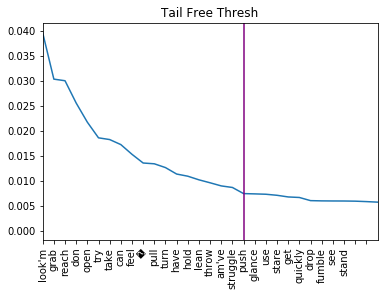

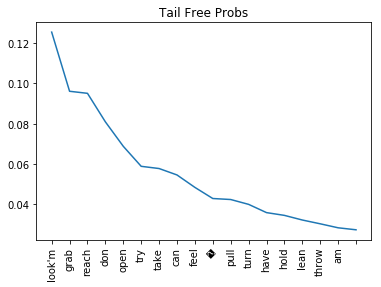

target word  it
tail value 13
target index 1


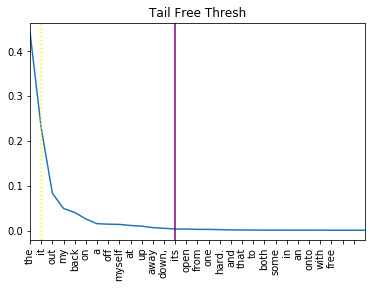

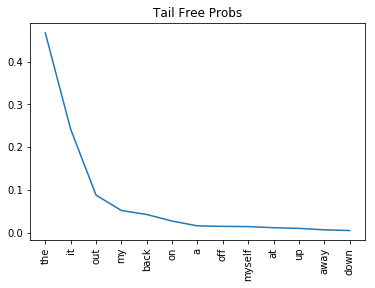

target word  up
tail value 8
target index 6


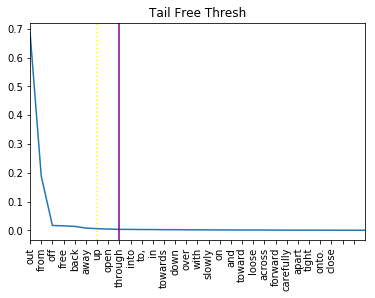

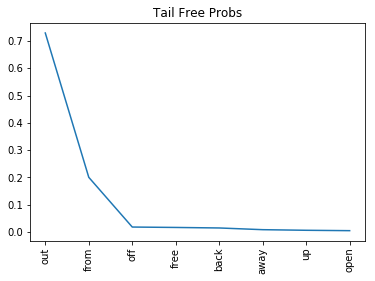

target word  and
tail value 9
target index 2


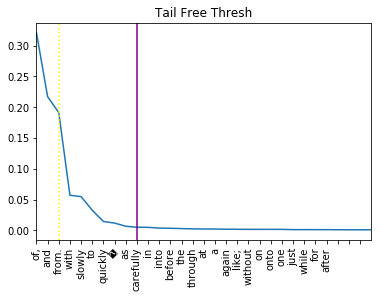

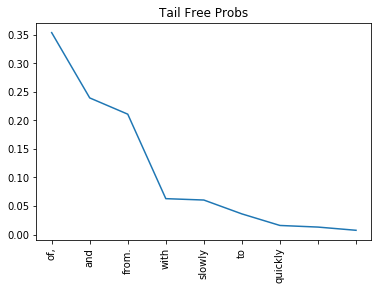

target word  keep
tail value 13
target index 123


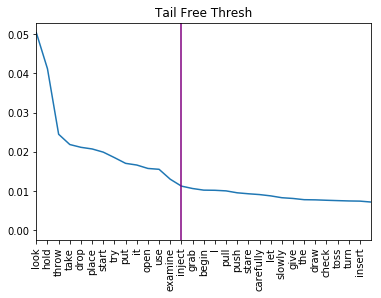

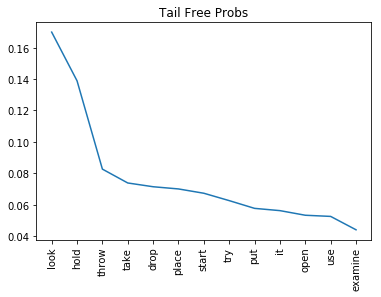

target word  running
tail value 5
target index 571


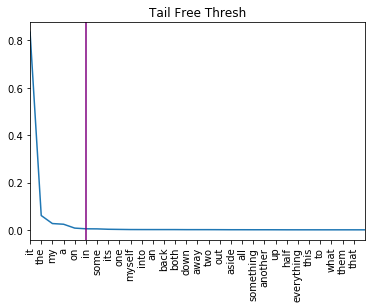

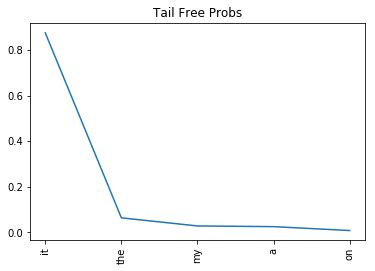

target word .
tail value 11
target index 67


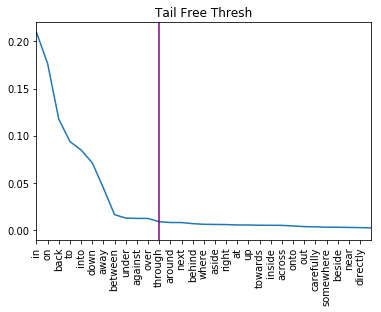

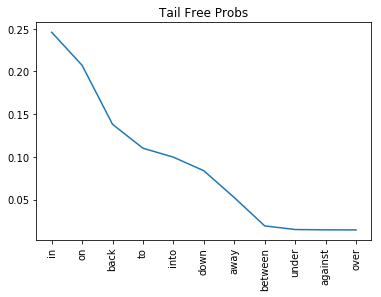

target word  Suddenly
tail value 7
target index 9836


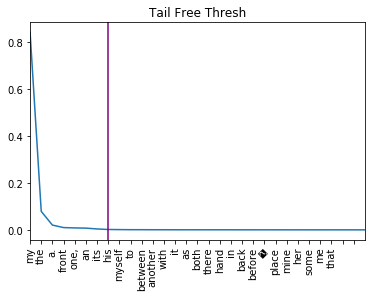

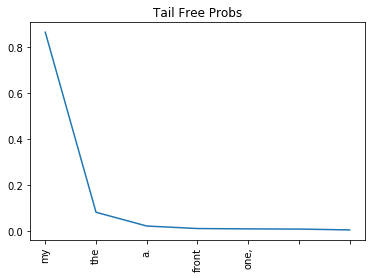

target word ,
tail value 4
target index 169


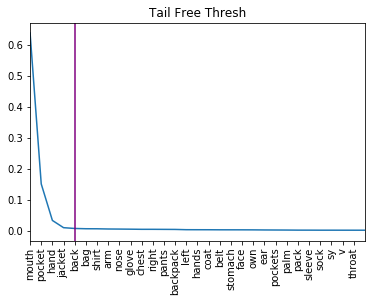

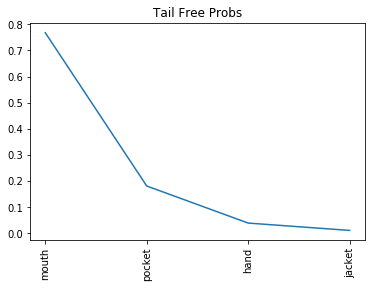

target word  I
tail value 6
target index 84


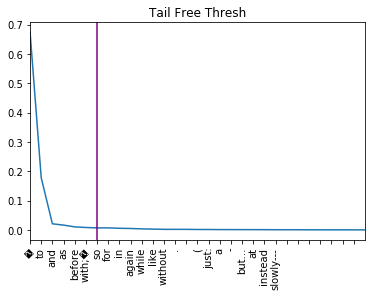

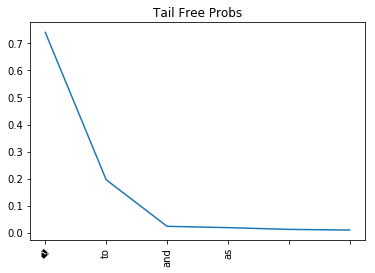

target word  hear
tail value 15
target index 3882


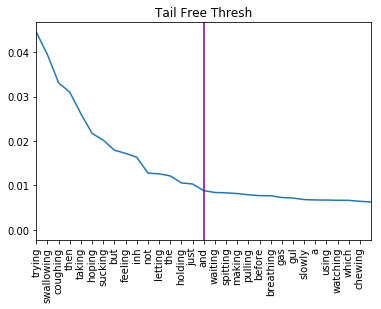

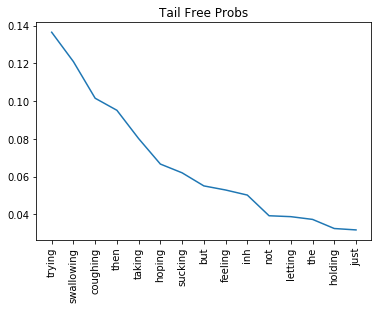

target word  an
tail value 14
target index 13


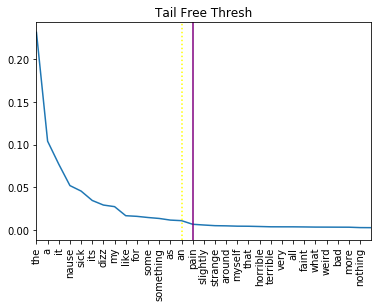

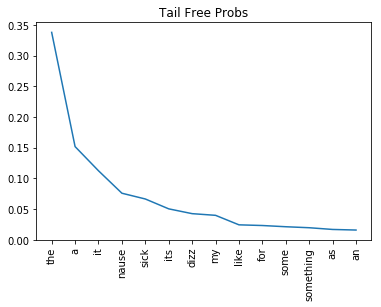

target word  explosion
tail value 8
target index 1965


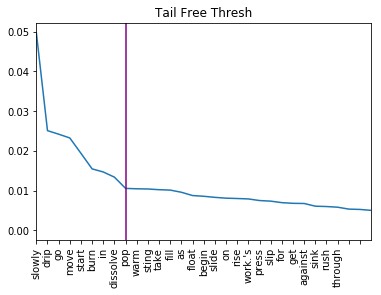

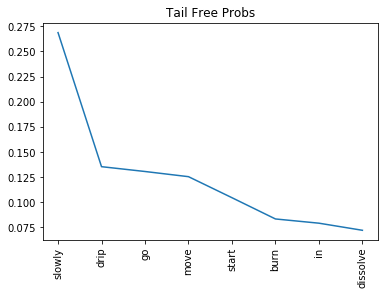

target word  behind
tail value 13
target index 4153


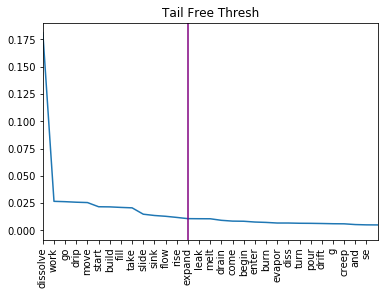

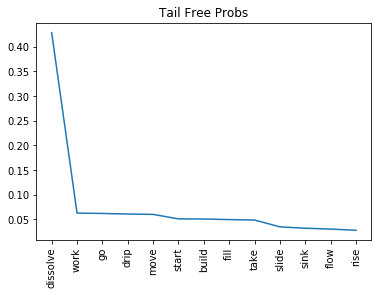

target word  me
tail value 19
target index 32


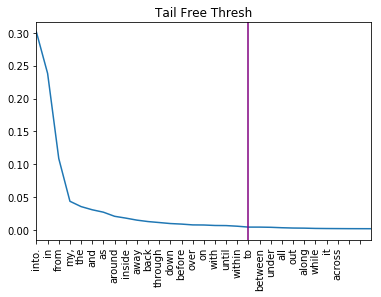

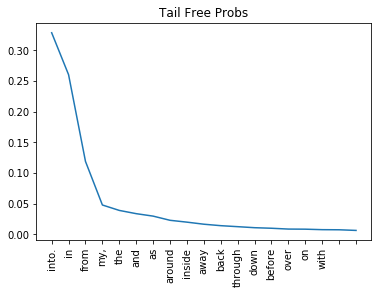

target word .
tail value 7
target index 276


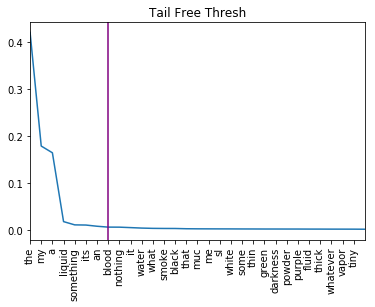

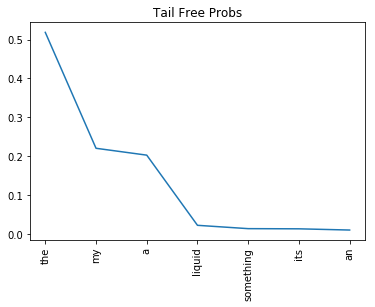

target word  I
tail value 14
target index 873


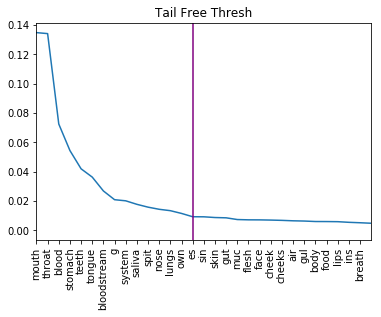

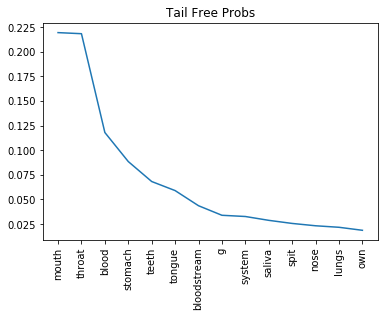

target word  can
tail value 6
target index 948


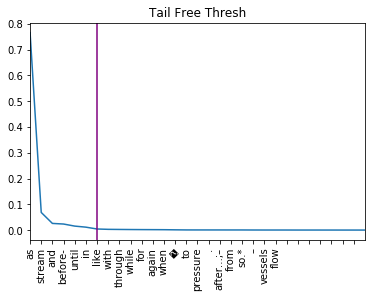

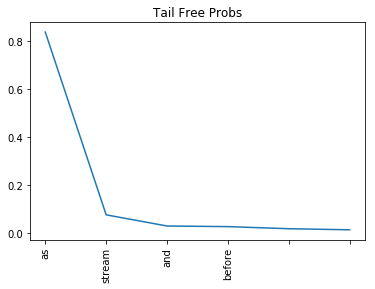

target word  �
tail value 20
target index 19


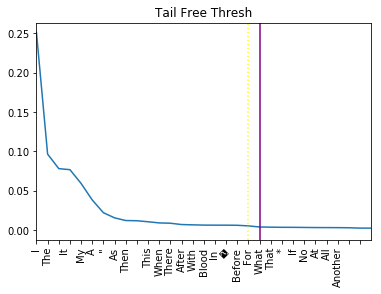

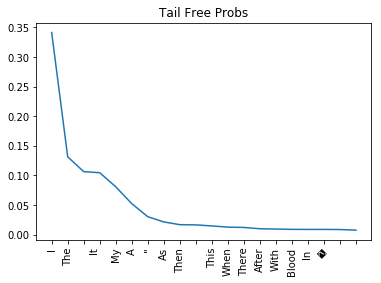

target word �
tail value 19
target index 39422


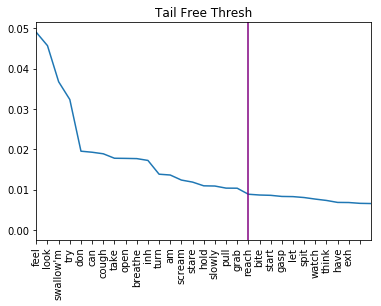

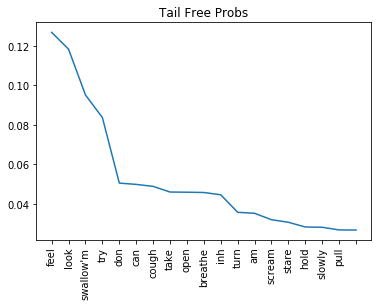

target word  t
tail value 14
target index 127


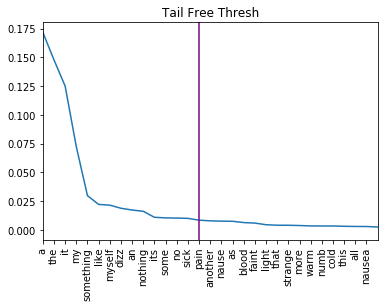

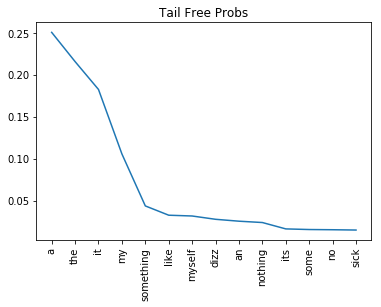

target word  help
tail value 4
target index 957


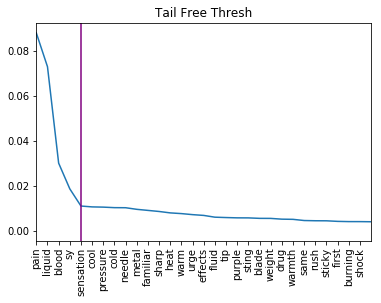

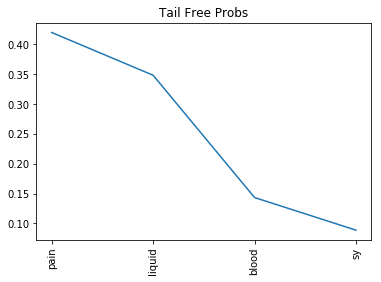

target word  but
tail value 7
target index 329


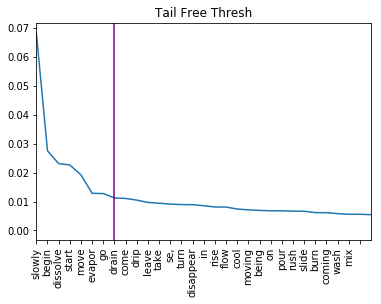

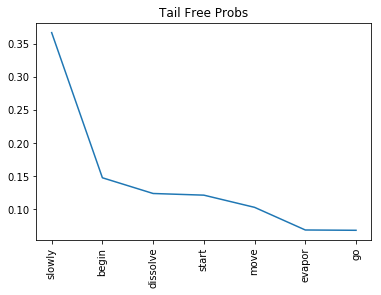

target word  turn
tail value 12
target index 1343


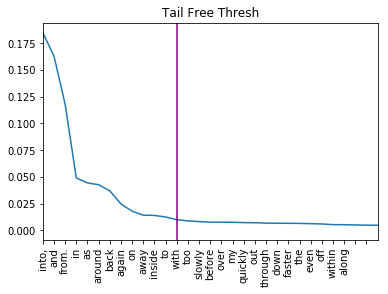

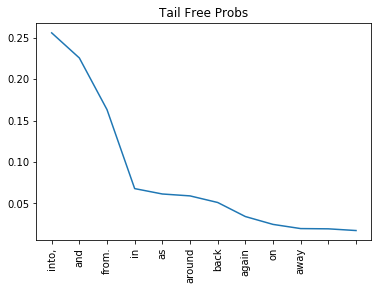

target word  around
tail value 11
target index 394


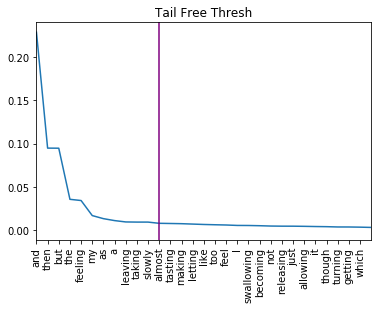

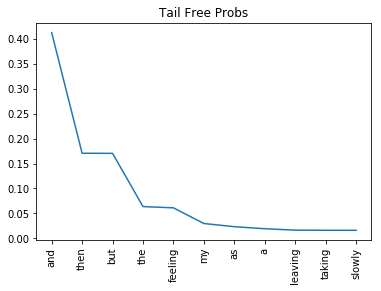

target word .
tail value 12
target index 264


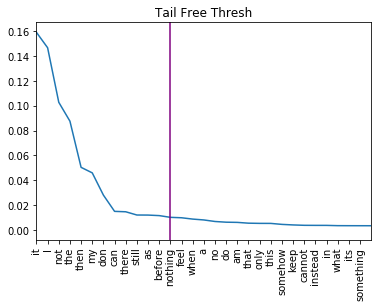

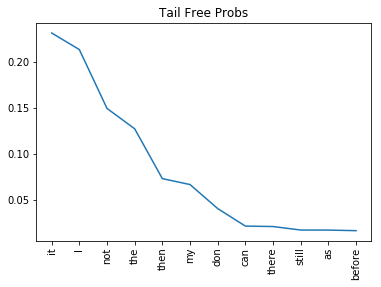

target word  
tail value 11
target index 100


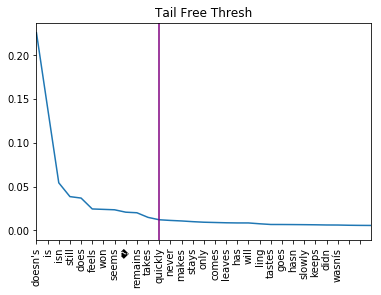

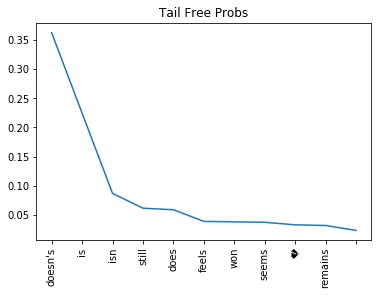

target word 

tail value 5
target index 41


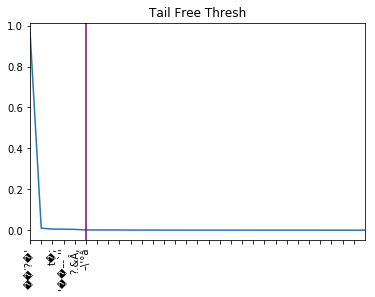

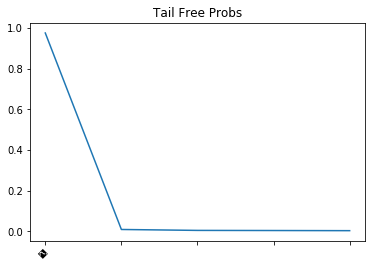

target word  
tail value 20
target index 136


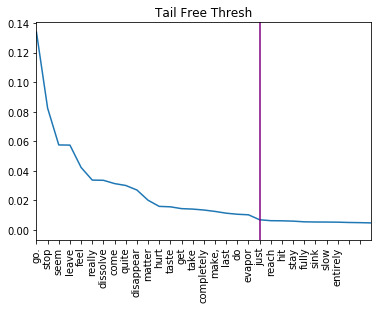

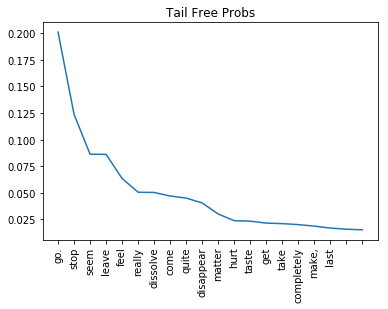

target word 

tail value 14
target index 202


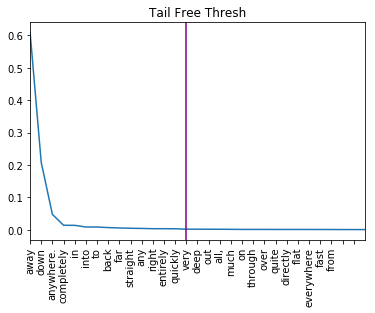

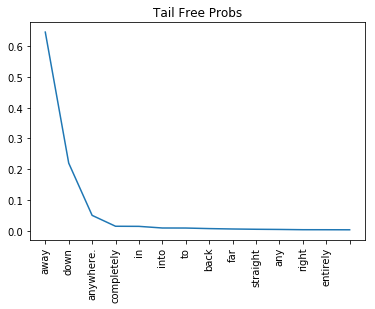

target word  Cat
tail value 13
target index 4667


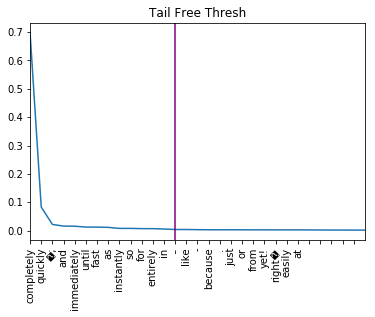

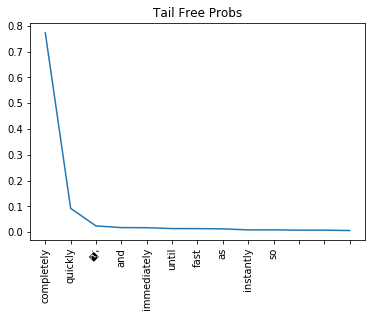

target word aclysm
tail value 20
target index 33058


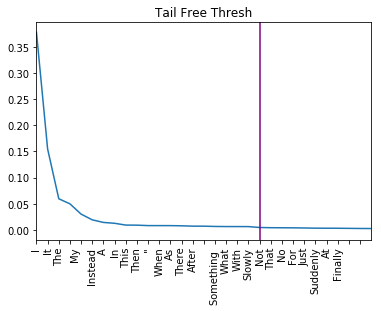

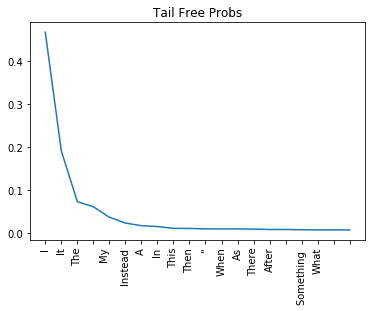

target word  is
tail value 11
target index 593


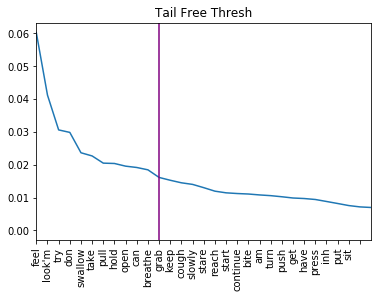

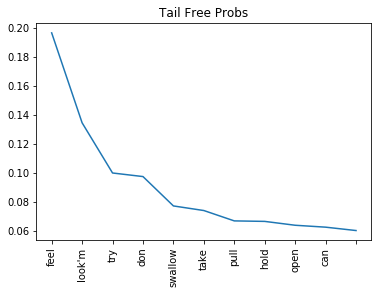

target word  floating
tail value 13
target index 970


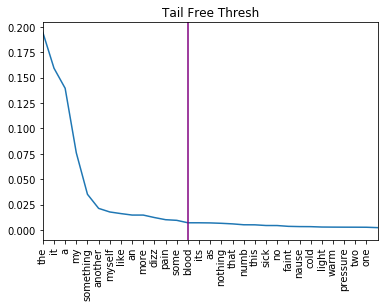

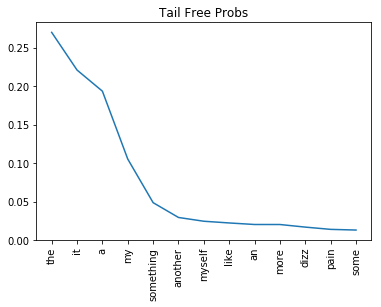

target word  through
tail value 18
target index 2043


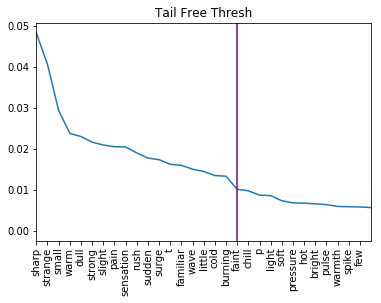

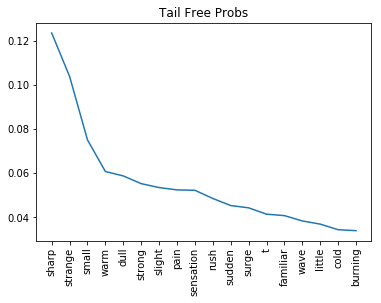

target word  the
tail value 5
target index 743


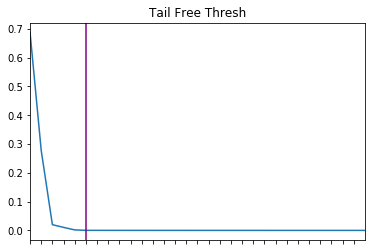

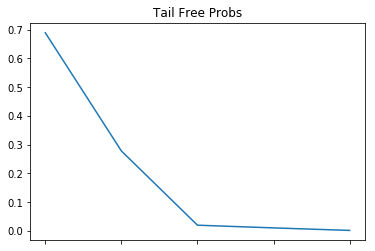

target word  street
tail value 20
target index 4115


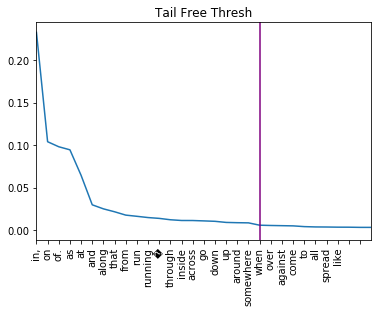

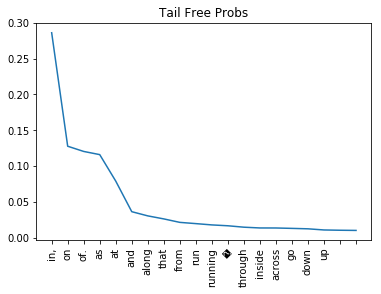

target word  towards
tail value 2
target index 897


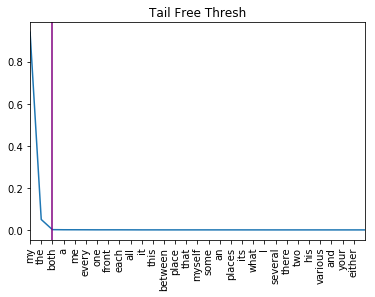

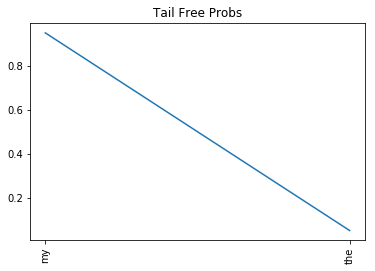

target word  me
tail value 21
target index 765


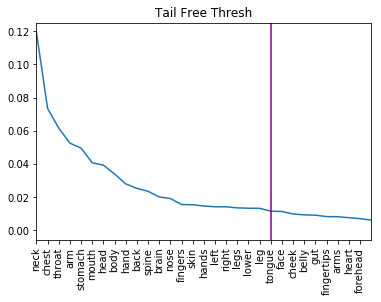

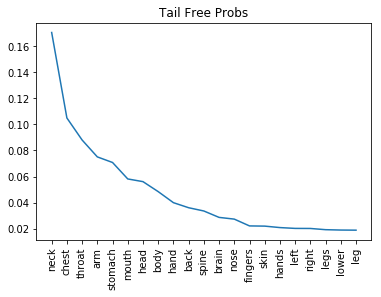

target word ,
tail value 5
target index 0


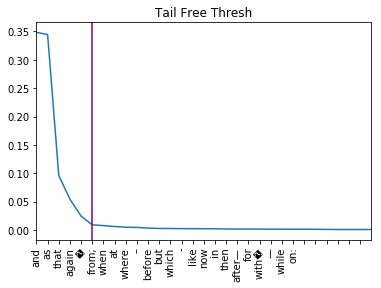

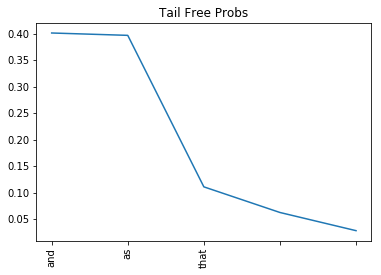

target word  fire
tail value 12
target index 459


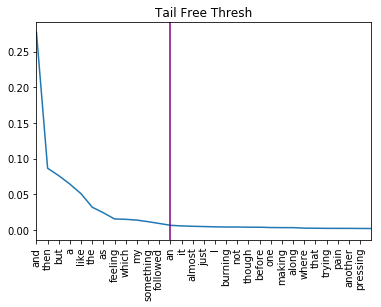

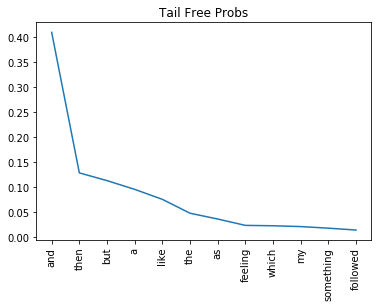

target word  and
tail value 14
target index 254


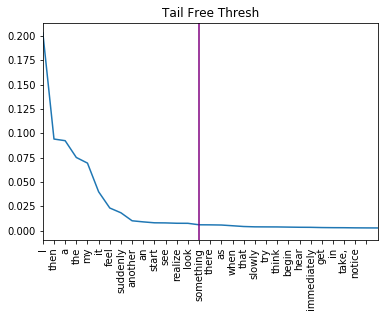

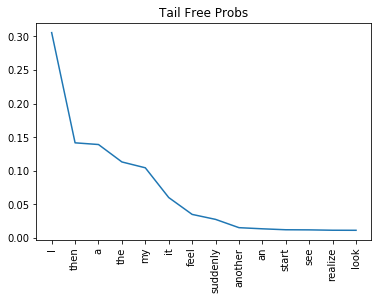

target word  smoke
tail value 15
target index 84


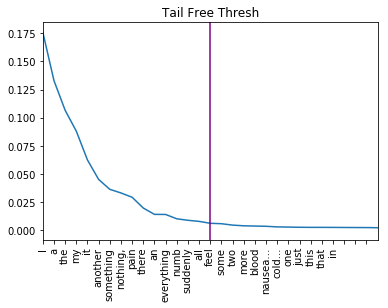

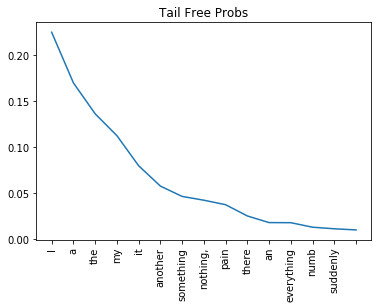

target word  trailing
tail value 7
target index 1760


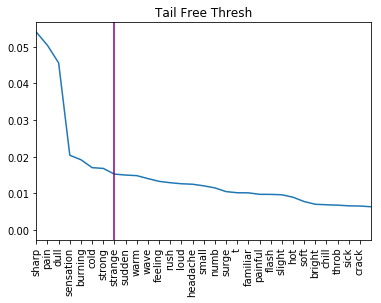

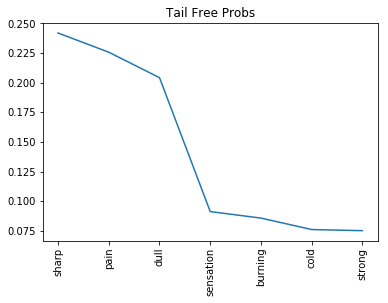

target word  in
tail value 16
target index 0


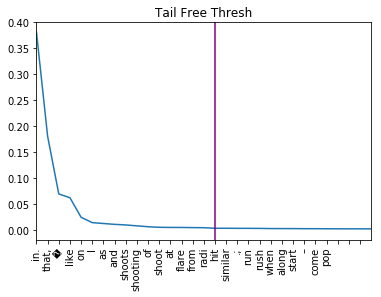

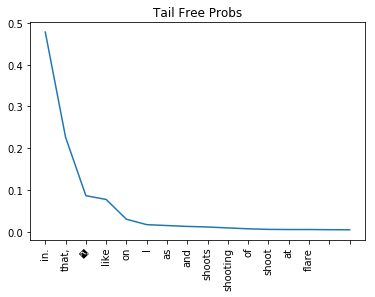

target word  his
tail value 16
target index 4233


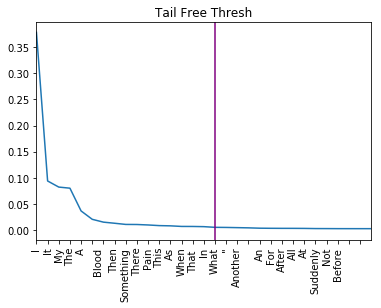

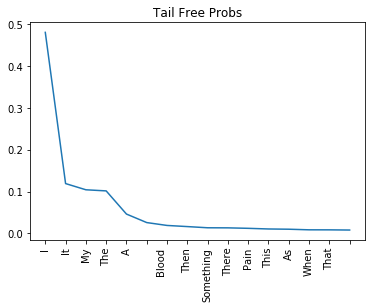

target word  path
tail value 12
target index 8262


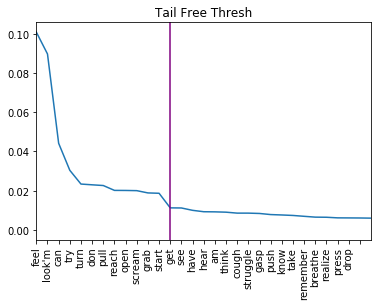

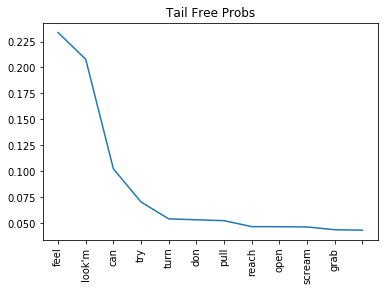

target word .
tail value 12
target index 170


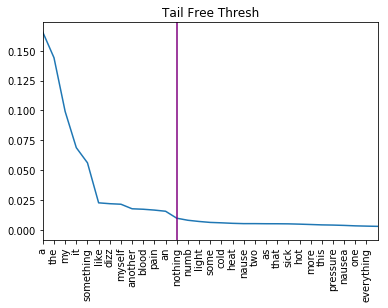

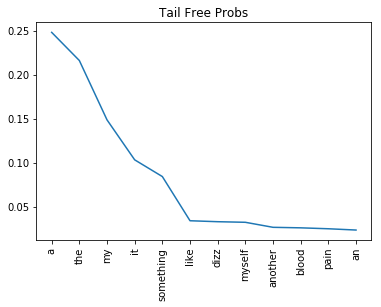

target word  He
tail value 14
target index 4202


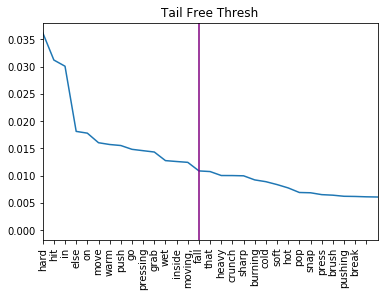

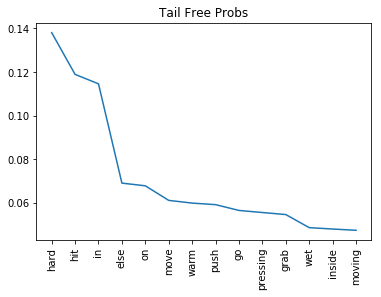

target word  has
tail value 2
target index 1146


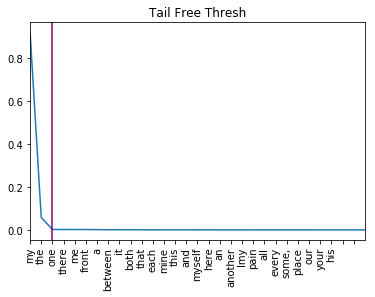

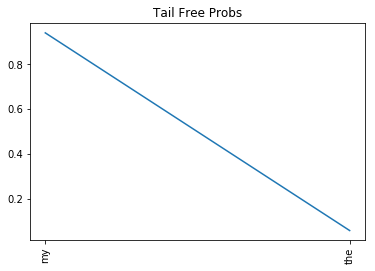

In [22]:
import matplotlib.pyplot as plt
from scipy.special import softmax
import pandas as pd    
import torch

#time_point = 1
plot_window_lim =30

def ema_eff(alpha,  vals, perc_acc=0.99 ):
    k = int(np.log(1-perc_acc)/np.log(1-alpha)) # this should be calculated at the start not in the loop!! 
    
    if k>vals.shape[0]: # CHECK THIS SHAPE MEASUREMENT
        k = vals.shape[0]
    
    # have something to check the tail id is less than the window size. 
    
    window_weights = (1-alpha)**np.arange(0,k)
    p = k-1
    # THIS CAN BE DONE IN A BATCH V EFFICIENTLY
    out = torch.nn.functional.conv1d(torch.from_numpy(vals).unsqueeze(0).unsqueeze(1).double(),torch.from_numpy(window_weights).unsqueeze(0).unsqueeze(1), padding=p )
    out = alpha*out[0,0,p:]
    #print(out.shape)
    
    return out.numpy()


print('Prompt: \n')
print(decoder_text( text[batch][ind, :prompt_length]))
print('\n ====== \n ')
print('Generation: \n ')
gen = text[batch][ind, prompt_length:]
print(decoder_text( text[batch][ind, prompt_length:]))
print('======')

target_prob_assigned = []

for time_point in range(0,50):

    sps = softmax(-np.sort(-all_logits[batch][ind, :, time_point]))
    indices = np.argsort(-all_logits[batch][ind, :, time_point])

    first = sps[1:] - sps[:-1]
    second = first[1:] - first[:-1]
    tail_id = second.shape[0]-np.argmax(np.flip(second)>0.001)    
    
    target_plot_index = np.where(target[time_point]==indices)[0][0] # this is the position in the indices where the word matches. 
    
    print('target word', decoder_text([target[time_point]]))

    #finding the tail without any alpha first
    ids_above_tail = indices[:tail_id] # use these indices to determine what the words are and their probabilities. 
    tail_free_probs = softmax(all_logits[batch][ind, ids_above_tail, time_point]) # it is already applying the softmax too
    
    target_prob_assigned.append(sps[target_plot_index]) # storing the probability given to the real word. 

    print('tail value', tail_id)
    print('target index', target_plot_index)

    plt.plot(np.arange(sps.shape[0]),sps)
    plt.xlim([0,plot_window_lim])
    plt.axvline(tail_id, color='purple', linestyle='solid')
    plt.axvline(target_plot_index, color='yellow', linestyle='dotted')
    plt.xticks(np.arange(plot_window_lim), decoder_text(indices[:plot_window_lim]).split(' ')[1:], rotation='vertical')
    plt.title('Tail Free Thresh')
    plt.show()

    plt.plot(np.arange(tail_free_probs.shape[0]), tail_free_probs)
    plt.title('Tail Free Probs')
    if target_plot_index in ids_above_tail:
        plt.axvline(target_plot_index, color='yellow', linestyle='dotted')
    plt.xticks(np.arange(tail_free_probs.shape[0]), decoder_text(ids_above_tail).split(' ')[1:], rotation='vertical')
    plt.show()

    #print('words in order',decoder_text(ids_above_tail))

    print('=============')

## Getting the probability assigned to the ground truth over time. 

In [23]:
prompts.iloc[choose_prompt].test_source

'[WP] Write a story where the antagonist is doing something obviously horrible, but by the end of the story make me want to side with him over the good guy.'

In [24]:
len(prompts.iloc[choose_prompt].test_target.split(' '))

716

In [25]:
len(prompts.iloc[choose_prompt].Prompt.split(' '))

531

In [26]:
def nucleus_calc(vals, thresh ):
    return np.argmax(np.cumsum(vals)>thresh)+1

def new_tfs(second, thresh):
    only_pos = np.abs(second)
    sec_indices = np.arange(len(second))
    sec_weights = only_pos/only_pos.sum()
    tail_id = np.argmax(np.cumsum(sec_weights)>thresh)+1
    return tail_id
        
def flat(sps, p):
    return sps.shape[0]-np.argmax(np.flip(sps)>p)+1

In [27]:
tot_num = 0
for i in range(num_batches):
    tot_num+= all_logits[i].shape[0]
print('total number of samples:', tot_num)

total number of samples: 100


In [28]:
tot_good_samples = list(set(range(tot_num)) - set(bad_inds))
tot_good_samples;

In [29]:
rand_selects.shape

(100,)

In [30]:
 all_logits[0].shape[2]

150

In [31]:
del all_logits

import matplotlib.pyplot as plt
from scipy.special import softmax
import pandas as pd    
import torch

num_samples = tot_num
num_batches = num_samples//batch_size

ground_token_in_cut = dict()
ground_truth_probs = dict()
generation_log_probs = dict()
generation_perplexity = dict()

all_tail_ids = dict()
all_tail_cdfs = dict()

num_target_too_short = 0

for key, params in vals_dict.items():
    print('Key is:', key)
    for par in params:
        if par ==None:
            par = "None"
        print('opening file:', 'gpt-2_output/all_logits_'+key+'-sampling-type_'+str(par)+'-sampling-param_100-word-prompts_150-gen-length_100-number-of-prompts.pickle.gz')
        all_logits = pickle.load( gzip.open('gpt-2_output/all_logits_'+key+'-sampling-type_'+str(par)+'-sampling-param_100-word-prompts_150-gen-length_100-number-of-prompts.pickle.gz', 'rb'))
        text = pickle.load( gzip.open('gpt-2_output/all_text_'+key+'-sampling-type_'+str(par)+'-sampling-param_100-word-prompts_150-gen-length_100-number-of-prompts.pickle.gz', 'rb'))
        #rand_selects = pickle.load( gzip.open('gpt-2_output/prompt_rand_selections_'+key+'-sampling-type_'+str(par)+'-sampling-param_100-word-prompts_150-gen-length_100-number-of-prompts.pickle.gz', 'rb'))

        temp_tail_cdfs = np.zeros([len(tot_good_samples), all_logits[0].shape[2]])
        temp_tail_ids = np.zeros([len(tot_good_samples), all_logits[0].shape[2]])
        p_ind = 0
        input_ind = 0 # for inputting into the array
        for batch in range(num_batches):
            
            for ind in range(0,all_logits[batch].shape[0]):
                
                if p_ind in bad_inds:
                    p_ind+=1
                    continue
                
                if p_ind%25 == 0:
                    print('index', str(p_ind))
                    
                # this is the ground truth calculations =====

                choose_prompt =rand_selects[p_ind]
                prompt_target_encoded = enc.encode(prompts.iloc[choose_prompt].Prompt)
                target = prompt_target_encoded[prompt_length:] # encode and get the prompt length. The rest is the ground truth. 

                '''if len(target) < all_logits[0].shape[2]: # some of the prompts ground truth completions
                    #are too short for the timepoint.
                    num_target_too_short+=1

                    #print('skipping as ground truth is too short for the array that I am using the store an plot the info.')
                    continue'''
                
                target_prob_assigned = []
                generation_log_probs_temp = []
                generation_perp_temp = []
                ground_token_in_cut_temp = []

                for time_point in range(0,all_logits[0].shape[2]):
                    #print(time_point)

                    sps = softmax(all_logits[batch][ind, :, time_point])
                    
                    target_prob_assigned.append(sps[target[time_point]])
                    token_chosen = text[batch][ind, prompt_length+time_point]# the text includes the starting prompt!!! 
                    
                    log_prob_here = np.log(sps[token_chosen])
                    generation_log_probs_temp.append(log_prob_here)
                    
                    #getting and storing perplexity here
                    # correcting for zeros but only inside the log.
                    generation_perp_temp.append(  np.power(2,  -np.sum( sps*np.log2(sps+0.000000001) ))  )
                    
                    sps = softmax(-np.sort(-all_logits[batch][ind, :, time_point]))
                    indices = np.argsort(-all_logits[batch][ind, :, time_point])
                    
                    if key == 'tfs':
                        first = sps[1:] - sps[:-1]
                        second = first[1:] - first[:-1]
                        tail_id = new_tfs(second, par)
                    elif key=='flat':
                        tail_id = flat(sps, par)
                    elif key=='n':
                        tail_id = nucleus_calc(sps, par)
                    elif key=='k':
                        tail_id = par
                    else:
                        print('key not recognized')
                        break

                    tail_cdf= np.sum(sps[:tail_id])

                    temp_tail_ids[input_ind, time_point] = tail_id
                    temp_tail_cdfs[input_ind, time_point] = tail_cdf
                    
                    ids_above_tail = indices[:tail_id]
                    ground_token_in_cut_temp.append( target[time_point] in ids_above_tail )
                    
                ground_token_in_cut[key+'-sampling-type_'+str(par)+'prompt_'+str(p_ind)] = ground_token_in_cut_temp
                ground_truth_probs[key+'-sampling-type_'+str(par)+'prompt_'+str(p_ind)] = target_prob_assigned
                generation_log_probs[key+'-sampling-type_'+str(par)+'prompt_'+str(p_ind)] = generation_log_probs_temp
                generation_perplexity[key+'-sampling-type_'+str(par)+'prompt_'+str(p_ind)] = generation_perp_temp
                
                p_ind+=1
                input_ind+=1
                
        all_tail_ids[key+'-sampling-type_'+str(par)] = temp_tail_ids
        all_tail_cdfs[key+'-sampling-type_'+str(par)] = temp_tail_cdfs
        
        print('number of prompts where the target is too short for this param', num_target_too_short)


Key is: tfs
opening file: gpt-2_output/all_logits_tfs-sampling-type_0.25-sampling-param_100-word-prompts_150-gen-length_100-number-of-prompts.pickle.gz
index 0
index 25
index 50
index 75
number of prompts where the target is too short for this param 0
opening file: gpt-2_output/all_logits_tfs-sampling-type_0.75-sampling-param_100-word-prompts_150-gen-length_100-number-of-prompts.pickle.gz
index 0
index 25
index 50
index 75
number of prompts where the target is too short for this param 0
opening file: gpt-2_output/all_logits_tfs-sampling-type_0.9-sampling-param_100-word-prompts_150-gen-length_100-number-of-prompts.pickle.gz
index 0
index 25
index 50
index 75
number of prompts where the target is too short for this param 0
opening file: gpt-2_output/all_logits_tfs-sampling-type_0.95-sampling-param_100-word-prompts_150-gen-length_100-number-of-prompts.pickle.gz
index 0
index 25
index 50
index 75
number of prompts where the target is too short for this param 0
opening file: gpt-2_output/al

In [32]:
pickle.dump(all_tail_ids, gzip.open('NewTFS_and_Flat_Tail_IDs_dict_Aug5.pickle', 'wb'))
pickle.dump(all_tail_cdfs, gzip.open('NewTFS_and_Flat_Tail_CDFs_dict_Aug5.pickle', 'wb'))
pickle.dump(ground_token_in_cut, gzip.open('NewTFS_and_Flat_GTruth_In_Cut_Aug5.pickle', 'wb'))
pickle.dump(ground_truth_probs, gzip.open('NewTFS_and_Flat_Ground_Truth_Probs_For_Each_Generation_Aug5.pickle', 'wb'))
pickle.dump(generation_log_probs, gzip.open('NewTFS_and_Flat_Generated_Token_Log_Probs_Aug5.pickle', 'wb'))
pickle.dump(generation_perplexity, gzip.open('NewTFS_and_Flat_Generated_Perplexities_Aug5.pickle', 'wb'))

In [33]:
import pickle
import gzip
all_tail_ids = pickle.load(gzip.open('NewTFS_and_Flat_Tail_IDs_dict_Aug5.pickle', 'rb'))
all_tail_cdfs = pickle.load(gzip.open('NewTFS_and_Flat_Tail_CDFs_dict_Aug5.pickle', 'rb'))
ground_token_in_cut=pickle.load(gzip.open('NewTFS_and_Flat_GTruth_In_Cut_Aug5.pickle', 'rb'))
ground_truth_probs=pickle.load(gzip.open('NewTFS_and_Flat_Ground_Truth_Probs_For_Each_Generation_Aug5.pickle', 'rb'))
generation_log_probs=pickle.load(gzip.open('NewTFS_and_Flat_Generated_Token_Log_Probs_Aug5.pickle', 'rb'))
generation_perplexity=pickle.load(gzip.open('NewTFS_and_Flat_Generated_Perplexities_Aug5.pickle', 'rb'))

In [ ]:
len(all_tail_ids['tfs-sampling-type_0.25'])

### Load in and compute the perplexities and probabilities of real completion

In [35]:
del all_logits
gpt_out_path = 'gpt-2_output/'
all_perps = pickle.load( gzip.open(gpt_out_path+'all_perplexities_perplexity_scores_for_the_dataset_Human_StoryPrompts_Completion.csv.pickle.gz', 'rb'))
all_logits = pickle.load( gzip.open(gpt_out_path+'all_logits_perplexity_scores_for_the_dataset_Human_StoryPrompts_Completion.csv.pickle.gz', 'rb')) # needed to get the probabilities
text = pickle.load( gzip.open(gpt_out_path+'all_text_perplexity_scores_for_the_dataset_Human_StoryPrompts_Completion.csv.pickle.gz', 'rb'))

In [36]:
len(text[0][0])

250

In [37]:
len(text[0])

23

In [38]:
all_perps[0].shape

(23, 150)

In [39]:
all_perps[0].shape

(23, 150)

In [40]:
len(text[0])

23

In [41]:
all_logits[0].shape

(23, 150, 50257)

In [42]:
num_batches = 4
#batch_size=25
import matplotlib.pyplot as plt
from scipy.special import softmax
import pandas as pd    
import torch

In [43]:
prompt_length

100

In [44]:
# getting probs assigned to the generated text
real_log_probs = dict()
for batch in range(num_batches):
    p_ind = 0
    for ind in range(0,all_logits[batch].shape[0]):
        real_log_probs_temp=[]
        for time_point in range(0,all_logits[0].shape[1]):
            sps = softmax(all_logits[batch][ind, time_point, : ])
            token_chosen = text[batch][ind][prompt_length+time_point]
            '''if p_ind == 0:
                print( decoder_text([token_chosen]) )'''
            log_prob_here = np.log(sps[token_chosen])
            real_log_probs_temp.append(log_prob_here)
            
        real_log_probs['real_text_prompt_'+str(p_ind)] = real_log_probs_temp
        p_ind+=1

In [45]:
'''max_vals = []
for batch in range(num_batches):
            #for p_ind in range(batch*batch_size, (batch*batch_size)+batch_size ):
    for ind in range(0,all_logits[batch].shape[0]):

        print(softmax(all_logits[batch][ind,0,:]).max())
        max_vals.append(softmax(all_logits[batch][ind,0,:]).max())'''

'max_vals = []\nfor batch in range(num_batches):\n            #for p_ind in range(batch*batch_size, (batch*batch_size)+batch_size ):\n    for ind in range(0,all_logits[batch].shape[0]):\n\n        print(softmax(all_logits[batch][ind,0,:]).max())\n        max_vals.append(softmax(all_logits[batch][ind,0,:]).max())'

## Plotting average perplexity and log probs

In [46]:
vals_dict

{'tfs': [0.25, 0.75, 0.9, 0.95, 0.99],
 'flat': [0.01, 0.02, 0.05],
 'n': [0.1, 0.25, 0.5, 0.75, 0.9],
 'k': [1, 10, 40, 200]}

In [47]:

num_samples =100

In [ ]:
params_to_plot = ['tfs_0.25','tfs_0.75', 'tfs_0.95']#['tfs_0.25','k_1', 'n_0.1']
#['tfs_0.25', 'tfs_0.95', 'k_1', 'k_200', 'n_0.9', 'flat_0.02errorbar'] #None prints all of them

for key, params in vals_dict.items():
    print('Key is:', key)
    for par in params:
        print(key+'-sampling-type_'+str(par)+'_prompt')
        vals_to_plot = []
        for p_ind in tot_good_samples:
            
            try:
                vals_to_plot.append(generation_perplexity[key+'-sampling-type_'+str(par)+'prompt_'+str(p_ind)])
            except:
                print('couldnt load in as not here!!!!!')
                pass
        vals_to_plot = np.asarray(vals_to_plot)
        
        #if key == "k" and str(par)=='1':
        '''plt.plot(vals_to_plot.T)
        plt.show()'''
        
        error_bars = vals_to_plot.mean(axis=0) -(1.96*(vals_to_plot.std(axis=0)/np.sqrt(vals_to_plot.shape[0])))

        
        if params_to_plot == None: 
            plt.errorbar(np.arange(vals_to_plot.shape[1]),vals_to_plot.mean(axis=0),error_bars, label=key+'-sampling-type_'+str(par))
        else:
            
            if key+'_'+str(par) in params_to_plot:
                print('variance of', key, 'param', str(par), 'is:', vals_to_plot.mean(axis=0).var()  )
                plt.errorbar(np.arange(vals_to_plot.shape[1]),vals_to_plot.mean(axis=0),error_bars, label=key+'-sampling-type_'+str(par))

for batch in range(num_batches):
            #for p_ind in range(batch*batch_size, (batch*batch_size)+batch_size ):
    #for ind in range(0,all_perps[batch].shape[0]):
    if batch==0:
        vals_to_plot = all_perps[batch]
    else: 
        vals_to_plot = np.concatenate((vals_to_plot,all_perps[batch]), axis=0 )
error_bars = vals_to_plot.mean(axis=0) -(1.96*(vals_to_plot.std(axis=0)/np.sqrt(vals_to_plot.shape[0])))
plt.errorbar(np.arange(vals_to_plot.shape[1]),vals_to_plot.mean(axis=0),error_bars ,label='Ground Truth')
plt.title('Perplexities')         
plt.legend()
plt.show()

### Model assings v low probability to the real generated word at each point. But perplexity is still similar. Is the ground word still included? Or is everything in a high state of confusion? Good similar amounts of randomness? Other models are also in states of confusion but 

In [ ]:
num_samples = 100

In [ ]:
vals_to_plot.shape

In [ ]:
vals_dict

In [ ]:
params_to_plot = ['n_0.9', 'tfs_0.95']#, 'tfs_0.95']
#['tfs_0.25', 'tfs_0.95', 'k_1', 'k_200'] #None prints all of them

for key, params in vals_dict.items():
    print('Key is:', key)
    for par in params:
        print(key+'-sampling-type_'+str(par)+'_prompt')
        vals_to_plot = []
        for p_ind in tot_good_samples:
            try:
                vals_to_plot.append(generation_log_probs[key+'-sampling-type_'+str(par)+'prompt_'+str(p_ind)])
            except:
                pass
                #print('couldnt load in as not here.')
        vals_to_plot = np.asarray(vals_to_plot)
        vals_to_plot = np.exp(vals_to_plot)
        
        '''if key == "k" and str(par)=='1':
            plt.plot(np.exp(vals_to_plot.T))
            plt.show()'''
        
        error_bars = vals_to_plot.mean(axis=0)-(1.96*(vals_to_plot.std(axis=0)/np.sqrt(vals_to_plot.shape[0])))

        if params_to_plot == None: 
            plt.errorbar(np.arange(vals_to_plot.shape[1]),vals_to_plot.mean(axis=0), error_bars,label=key+'-sampling-type_'+str(par))
        else:
            if key+'_'+str(par) in params_to_plot:
                print('variance of', key, 'param', str(par), 'is:', vals_to_plot.mean(axis=0).var()  )
                plt.errorbar(np.arange(vals_to_plot.shape[1]),vals_to_plot.mean(axis=0), error_bars,label=key+'-sampling-type_'+str(par))
                '''plt.plot(vals_to_plot.mean(axis=0),label=key+'-sampling-type_'+str(par))
                inter = np.arange(0,vals_to_plot.shape[1],25)
                plt.errorbar(inter,vals_to_plot.mean(axis=0)[inter], error_bars[inter],label=key+'-sampling-type_'+str(par))
                '''
vals_to_plot = []
for key, values in real_log_probs.items():
    vals_to_plot.append(values)
vals_to_plot = np.asarray(vals_to_plot)
#plt.errorbar(np.arange(vals_to_plot.shape[1]),vals_to_plot.mean(axis=0), error_bars,label='Ground Truth')
                
plt.legend()
plt.show()

## investigating where the stripes are:

In [ ]:
len(generation_log_probs[k])

In [ ]:
found_count = 0

for t in range(16,20):
    vals = []
    print(t)
    for k in generation_log_probs.keys():
        if 'tfs' in k and 'sampling-type_0.25prompt' in k:
            found_count +=1
            #print(np.exp(generation_log_probs[k][time_point]))
            vals.append(np.exp(generation_log_probs[k][t]))
    print('number found', found_count)
    print( 'mean', np.asarray(vals).mean() )
    print('std', np.asarray(vals).std() )
    plt.hist(vals)
    plt.show()

In [ ]:
vals_to_plot.mean(axis=0).shape

# Mean Probs Given to ground truth real completion words

In [ ]:
vals_to_plot.

In [ ]:
global_mean = dict()
for key, params in vals_dict.items():
    print('Key is:', key)
    for par in params:
        print(key+'-sampling-type_'+str(par)+'_prompt')
        vals_to_plot = []
        for p_ind in tot_good_samples:
            try:
                vals_to_plot.append(ground_truth_probs[key+'-sampling-type_'+str(par)+'prompt_'+str(p_ind)])
            except:
                print('couldnt load in as not here.')
                pass
        vals_to_plot = np.asarray(vals_to_plot)
        
        if key == "k" and str(par)=='1':
            plt.plot(vals_to_plot.T)
            plt.show()
            plt.plot(vals_to_plot.mean(axis=0))
            plt.show()
            
        if key == "n" and str(par)=='0.9':
            plt.plot(vals_to_plot.T)
            plt.show()
            plt.plot(vals_to_plot.mean(axis=0))
            plt.show()
            
        if key == "n" and str(par)=='0.1':
            plt.plot(vals_to_plot.T)
            plt.show()
            plt.plot(vals_to_plot.mean(axis=0))
            plt.show()
        
        global_mean[key+'-sampling-type_'+str(par)+'_prompt'] = (vals_to_plot.mean(), vals_to_plot.mean()-(1.96*(vals_to_plot.std()/np.sqrt(vals_to_plot.shape[0]))))
        print('=======')

In [ ]:
#pickle.dump(global_mean, gzip.open('Probability_given_to_ground_truth_dict_July14.pickle', 'wb'))

In [ ]:
means =[]
errors = []
for k, v in global_mean.items():
    means.append(v[0])
    errors.append(v[1])

In [ ]:
plt.bar(global_mean.keys(), means, yerr=errors)
plt.xticks(rotation='vertical')
plt.show()

### I could also try to get a binary output for whether or not the true word was above the tail id.

In [ ]:
vals_to_plot.shape

In [ ]:
global_mean = dict()
for key, params in vals_dict.items():
    print('Key is:', key)
    for par in params:
        print(key+'-sampling-type_'+str(par)+'_prompt')
        vals_to_plot = []
        for p_ind in tot_good_samples:
            try:
                vals_to_plot.append(ground_token_in_cut[key+'-sampling-type_'+str(par)+'prompt_'+str(p_ind)])
            except:
                pass
                #print('couldnt load in as not here.')
        vals_to_plot = np.asarray(vals_to_plot)
        
        if key == "k" and str(par)=='1':
            plt.plot(vals_to_plot.T)
            plt.show()
            plt.plot(vals_to_plot.mean(axis=0))
            plt.show()
            
        if key == "n" and str(par)=='0.9':
            plt.plot(vals_to_plot.T)
            plt.show()
            plt.plot(vals_to_plot.mean(axis=0))
            plt.show()
        
        global_mean[key+'-sampling-type_'+str(par)+'_prompt'] = (vals_to_plot.mean(), vals_to_plot.mean()-(1.96*(vals_to_plot.std()/np.sqrt(vals_to_plot.shape[0]))))
        print('=======')

In [ ]:
means =[]
errors = []
for k, v in global_mean.items():
    means.append(v[0])
    errors.append(v[1])

In [ ]:
plt.bar(global_mean.keys(), means, yerr=errors)
plt.xticks(rotation='vertical')
plt.show()

# Getting the Tail ID positions and CDFs, NB this is for different prob dists for each. 

Need to run for the same one
And get binary output for if the true word is above the tail id or not.

In [ ]:
'''all_tail_tfs_ids = pickle.load(gzip.open('Tail_IDs_TFS_dict_July14.pickle', 'rb'))
all_tail_tfs_cdfs = pickle.load(gzip.open('Tail_CDFs_TFS_dict_July14.pickle', 'rb'))'''

In [ ]:
set(range(5)) - set([3,2])

In [ ]:
li = []
for k in ground_token_in_cut.keys():
    li.append(int(k.split('_')[-1]))
inside = set(li)
missing = set(range(100)) - inside
list(missing)

In [ ]:
inside = list(inside)

In [ ]:
# need to have them all compete against each other to see what is the highest in each of the positions. 

very_first = True

for key, params in vals_dict.items():
    print('Key is:', key)
    for par in params:
        if tot_num != all_tail_ids[key+'-sampling-type_'+str(par)].shape[0]:
            print('these sizes are not the same!')
            print('trimming the last ones')
            all_tail_ids[key+'-sampling-type_'+str(par)] =  all_tail_ids[key+'-sampling-type_'+str(par)][inside,:]
            all_tail_cdfs[key+'-sampling-type_'+str(par)] =  all_tail_cdfs[key+'-sampling-type_'+str(par)][inside,:]

            
        flat_ids = all_tail_ids[key+'-sampling-type_'+str(par)].flatten()
        flat_cdfs = all_tail_cdfs[key+'-sampling-type_'+str(par)].flatten()

        if very_first ==True:

            tail_id_df = pd.DataFrame({key+'-sampling-type_'+str(par):flat_ids})
            tail_cdf_df = pd.DataFrame({key+'-sampling-type_'+str(par):flat_cdfs})
            very_first=False

        else:

            tail_id_df[key+'-sampling-type_'+str(par)] = flat_ids
            tail_cdf_df[key+'-sampling-type_'+str(par)] = flat_cdfs
        

In [ ]:
tail_id_df.head()

In [ ]:
tail_cdf_df.head()

In [ ]:
tail_id_df.shape

In [ ]:
tail_id_df.iloc[0].values

In [ ]:
np.argsort(tail_id_df.iloc[0,:].values)

In [ ]:
tail_id_df.shape

In [ ]:
tail_id_df.rank(axis=1, method='average').iloc[0].max() 

In [ ]:
tail_id_df_ranking = tail_id_df.rank(axis=1, method='dense')  # lowest

In [ ]:
tail_id_df_ranking.head()

In [ ]:
tail_cdf_df_ranking = tail_cdf_df.rank(axis=1, method='dense')
tail_cdf_df_ranking.head()

In [ ]:
for c in tail_id_df_ranking.columns: 
    
    tail_id_df_ranking[c].hist(bins=100)
    plt.title('Tail ID Ranking '+c)
    plt.show()

In [ ]:
tfs_n_cols = []
for c in tail_id_df.columns:
    if 'tfs-' in c or 'n-' in c:
        tfs_n_cols.append(c)

In [ ]:
tfs_n_cols

In [ ]:
# only for tfs and n
temp_rank = tail_id_df[tfs_n_cols].rank(axis=1, method='dense')
for c in temp_rank.columns: 

    temp_rank[c].hist(bins=100)
    plt.title('Tail ID Ranking '+c)
    plt.show()

In [ ]:
tail_cdf_df.head()

In [ ]:
tail_cdf_df.shape

In [ ]:
tail_cdf_df['tfs-sampling-type_0.25'].describe()

In [ ]:
(tail_cdf_df['n-sampling-type_0.5']<0.5).sum()

In [ ]:
for c in tail_cdf_df.columns: 
    
    tail_cdf_df[c].hist(bins=100)
    plt.title(c)
    plt.show()

In [ ]:
for c in tail_cdf_df_ranking.columns: 
    
    tail_cdf_df_ranking[c].hist(bins=100)
    plt.title(c)
    plt.show()

## Investigating the Samplings

In [92]:
'''all_tail_cdfs = pickle.load(gzip.open('Tail_CDFs_dict_July14.pickle', 'rb')) # get this from "Analyze Logits"
all_tail_ids = pickle.load(gzip.open('Tail_IDs_dict_July14.pickle', 'rb'))'''

'all_tail_cdfs = pickle.load(gzip.open(\'Tail_CDFs_dict_July14.pickle\', \'rb\')) # get this from "Analyze Logits"\nall_tail_ids = pickle.load(gzip.open(\'Tail_IDs_dict_July14.pickle\', \'rb\'))'

In [ ]:

len(all_tail_cdfs.keys())

In [ ]:
all_tail_cdfs.keys()

In [ ]:
all_tail_cdfs['n-sampling-type_0.25'].shape

In [ ]:
very_first = True

vals_dict = {'n': [0.1, 0.25, 0.5, 0.75, 0.9], 'k':[1,10,40,200], 'tfs':[None, 0.01, 0.05, 0.1, 0.5, 0.75 ]}

for key, params in vals_dict.items():
    print('Key is:', key)
    for par in params:
        
        specific_ids = all_tail_ids[key+'-sampling-type_'+str(par)][select_a_random_prompt,:]
        specific_cdfs = all_tail_cdfs[key+'-sampling-type_'+str(par)][select_a_random_prompt,:]

        if very_first ==True:

            tail_id_df = pd.DataFrame({key+'-sampling-type_'+str(par):specific_ids})
            tail_cdf_df = pd.DataFrame({key+'-sampling-type_'+str(par):specific_cdfs})
            very_first=False

        else:

            tail_id_df[key+'-sampling-type_'+str(par)] = specific_ids
            tail_cdf_df[key+'-sampling-type_'+str(par)] = specific_cdfs
        

In [ ]:
tail_cdf_df.head()

In [ ]:
key = 'tfs'
par = 0.01

In [ ]:
tail_cdf_df[tail_cdf_df[key+'-sampling-type_'+str(par)].values>0.95]

In [ ]:
tail_id_df.loc[list(tail_cdf_df[tail_cdf_df[key+'-sampling-type_'+str(par)].values>0.95].index)]

In [ ]:
tail_id_df[tail_id_df[key+'-sampling-type_'+str(par)].values>50000]

In [ ]:
del all_logits

all_logits = pickle.load( gzip.open('gpt-2_output/all_logits_'+key+'-sampling-type_'+str(par)+'-sampling-param_100-word-prompts_150-gen-length_100-number-of-prompts.pickle.gz', 'rb'))
text = pickle.load( gzip.open('gpt-2_output/all_text_'+key+'-sampling-type_'+str(par)+'-sampling-param_100-word-prompts_150-gen-length_100-number-of-prompts.pickle.gz', 'rb'))
len(all_logits)

In [ ]:
batch_size = 25
from decodeLogits import *
batch = select_a_random_prompt//batch_size
ind = select_a_random_prompt - batch*batch_size

all_logits[batch][ind].shape

In [ ]:
sps.shape

In [ ]:
import matplotlib.pyplot as plt
from scipy.special import softmax
import pandas as pd    
import torch

#time_point = 1
plot_window_lim =30

'''def ema_eff(alpha,  vals, perc_acc=0.99 ):
    k = int(np.log(1-perc_acc)/np.log(1-alpha)) # this should be calculated at the start not in the loop!! 
    
    if k>vals.shape[0]: # CHECK THIS SHAPE MEASUREMENT
        k = vals.shape[0]
    
    # have something to check the tail id is less than the window size. 
    
    window_weights = (1-alpha)**np.arange(0,k)
    p = k-1
    # THIS CAN BE DONE IN A BATCH V EFFICIENTLY
    out = torch.nn.functional.conv1d(torch.from_numpy(vals).unsqueeze(0).unsqueeze(1).double(),torch.from_numpy(window_weights).unsqueeze(0).unsqueeze(1), padding=p )
    out = alpha*out[0,0,p:]
    #print(out.shape)
    
    return out.numpy()'''

def new_tfs(second, thresh):
    only_pos = np.abs(second)
    sec_indices = np.arange(len(second))
    sec_weights = only_pos/only_pos.sum()
    tail_id = np.argmax(np.cumsum(sec_weights)>thresh)+1
    return tail_id
        
def flat(sps, p):
    return sps.shape[0]-np.argmax(np.flip(sps)>p)

print('Prompt: \n')
print(decoder_text( text[batch][ind, :prompt_length]))
print('\n ====== \n ')
print('Generation: \n ')
gen = text[batch][ind, prompt_length:]
print(decoder_text( text[batch][ind, prompt_length:]))
print('======')

for time_point in range(0,10):
    
    sps = softmax(-np.sort(-all_logits[batch][ind, :, time_point]))
    indices = np.argsort(-all_logits[batch][ind, :, time_point])
    first = sps[1:] - sps[:-1]
    second = first[1:] - first[:-1]
    
    plt.plot(np.arange(sps.shape[0]),sps)
    
    if key == 'tfs':
        tail_id = new_tfs(sps, par)
    elif key=='flat':
        tail_id = flat(sps, par)
    
    
    print('tail id is:', tail_id)
    plt.axvline(tail_id, color='purple', linestyle='solid')
    
    plt.xlim([0,plot_window_lim])
    plt.xticks(np.arange(plot_window_lim), decoder_text(indices[:plot_window_lim]).split(' ')[1:], rotation='vertical')
    plt.title('Prob Dist')
    plt.show()
        
    '''plt.plot(np.arange(second.shape[0]),second)
    plt.xlim([0,plot_window_lim])
    plt.axhline(0.00001, color='red', linestyle='solid')
    plt.title('Second Gradient')
    plt.show()'''
    
    if tail_id>500:
        print('tail ID isnt specific enough, skipping this plot')
        print('=============')
        continue
        
    ids_above_tail = indices[:tail_id] # use these indices to determine what the words are and their probabilities. 
    tail_free_probs = softmax(all_logits[b, ids_above_tail, i])

    plt.plot(np.arange(tail_free_probs.shape[0]), tail_free_probs)
    plt.title('Tail Free Probs')
    plt.xticks(np.arange(tail_free_probs.shape[0]), decoder_text(ids_above_tail).split(' ')[1:], rotation='vertical')
    plt.show()

    #print('words in order',decoder_text(ids_above_tail))

    print('=============')